In [2]:
#Import necessary packages and upload data files
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import *

import os
# os.chdir('C:\\Users\\enewm\\Documents\\MA 510\\data')

#Read Train Data 
df = pd.read_csv("../cleaned_train.csv")
df = df.drop(columns = ['Unnamed: 0'])
#PCA dimension reduced files
X_train = pd.read_pickle("../X_train_pca.npk")
X_test = pd.read_pickle("../X_test_pca.npk")

#keeps the totalRansactionRevenue, class_pred = 0 if didnt buy anythin and 1 if did
y_test = pd.read_pickle("../y_test.pkl")
y_train = pd.read_pickle("../y_train.pkl")



/Users/cassidylitch/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
#Remove entries with 0 revenue for PCA Data training set 
X_train=X_train[y_train ['totals.transactionRevenue']!=0]
y_train = y_train[y_train['totals.transactionRevenue'] != 0]


In [76]:
#Remove entries with 0 revenue in the testing set in PCA Data
X_test=X_test[y_test['totals.transactionRevenue']!=0]
y_test=y_test[y_test['totals.transactionRevenue']!=0]

In [77]:
#Remove any additional columns and change to predict on the log
y_train_rev= np.log(y_train['totals.transactionRevenue'])
y_test_rev= np.log(y_test['totals.transactionRevenue'])


In [80]:
#Remove all 0 values from the original training set
df = df[df['totals.transactionRevenue'] != 0]
#Separate into predictors and response
y_original =df[['totals.transactionRevenue', 'fullVisitorId']]
x_original=df.drop(columns = ['totals.transactionRevenue', 'class_pred', 'fullVisitorId'])

In [81]:
#Create a training and test set for the data
x_train_orig, x_test_orig, y_train_orig, y_test_orig= train_test_split(x_original,y_original,test_size=0.2, random_state=4)
y_train_orig['totals.transactionRevenue'] = np.log(y_train_orig['totals.transactionRevenue'].copy())
y_test_orig['totals.transactionRevenue'] = np.log(y_test_orig['totals.transactionRevenue'].copy())

/Users/cassidylitch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cassidylitch/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
list(y_train_orig)

['totals.transactionRevenue', 'fullVisitorId']

# Full Data

In [83]:
# Cross Validation to determine alpha level (lambda) for original dataset
alphas = np.linspace(1e-15,20,num=100)
ridgecv_orig = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridgecv_orig.fit(x_train_orig, y_train_orig['totals.transactionRevenue'])
print("best alpha for full data: " +  str(ridgecv_orig.alpha_))
#Alpha=0.0066

best alpha for full data: 1e-15


/Users/cassidylitch/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.82773395085e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


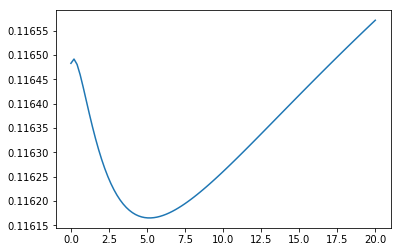

In [53]:
from sklearn.linear_model import Ridge
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alpha_ridge = np.linspace(1e-15,20,num=100)


scores = []
for alpha in alpha_ridge:
    clf = Ridge(alpha)
    clf.fit(x_train_orig, y_train_orig['totals.transactionRevenue'])
    sc = clf.score(x_test_orig, y_test_orig['totals.transactionRevenue'])
    scores.append(sc)

plt.plot(alpha_ridge, scores)

In [86]:
#Compute Test MSE on Original Dataset
mse=mean_squared_error(y_test_orig['totals.transactionRevenue'], ridgecv_orig.predict(x_test_orig))
rmse=math.sqrt(mse)
print("Full data predicting log: " + str(rmse))

Full data predicting log: 1.09244595158


# PCA data

In [59]:
#Divide PCA Testing set into Training and Test Set
# x_train2, x_test2 , y_train2, y_test2= train_test_split(X_train,y_train_rev,test_size=0.2, random_state=4)

#why do this we already started with this split correctly
list(y_train)

['totals.transactionRevenue', 'class_pred', 'fullVisitorId']

In [89]:
# Cross Validation to determine alpha level (lambda) (PCA data)
alphas = np.linspace(1e-15,20,num=100)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True, cv =3)
ridgecv.fit(X_train, y_train_rev)
ridgecv.alpha_
#Alpha=1.7555

0.20202020202020302

In [91]:
#Compute Test MSE for the testing subset of the PCA data 
mse=mean_squared_error(y_test_rev, ridgecv.predict(X_test))
rmse=math.sqrt(mse)
print("RMSE of PCA predicting on log: " + str(rmse))

RMSE of PCA predicting on log: 1.14378160368


In [77]:
#Compute Test MSE on First Test Data Set not used in model
mse=mean_squared_error(y_test_rev, ridgecv.predict(X_test))
rmse=math.sqrt(mse)
rmse


378945613.8208025